# Informe nº8
    NOTA IMPORTANTE: En este informe se respresentan los resultaddos obtenidos de ejecutar los scripts con anterioridad. Para poder observar los resulatdos en tiempo real hay que tener acceso a la cámara, es decir, para poder obtener una imágen en el momento y poder ejecutar todas las funciones hay que ejecutar el notebook en local estando conectado a la red de la Universidad Politécnica o al IES.
    Fecha: 29/08/2020
   
   ### Ejemplos prácticos de uso de la librería
    A continuación se exponen las funciones que se pueden desarrollar con el uso de la librería que engloba todo el proyecto.

In [1]:
!pip install opencv-python
!pip install matplotlib
!pip install pvlib
!pip install pyephem
!pip install pandas
!pip install datetime
!pip install sklearn
!pip install seaborn

from datetime import datetime as dt
from matplotlib import pyplot as plt
import numpy as np
import cv2
import interfaz_camara as pycam

   #### Modificación de los parámetros de la cámara
    Se exponen las funciones mediante las cuales se pueden modificar algunos de los parámetros de la cámara que son necesarios para el correcto funcionamiento de la librería. Estos parámetros se encuentran en el archivo "./config_interfaz.txt".

In [ ]:
# cambio_pos_camara(latitud, longitud, altitud)

# cambio_caracteriticas_imagen(img)

   #### Toma de imagen en tiempo real
    Se comunica con la cámara para obtener una imagen en tiempo real del cielo.

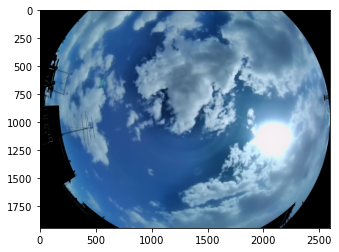

In [2]:
img_bgr = pycam.toma_imagen()
img_bgr = pycam.pre_procesado(img_bgr)

pycam.muestra_imagen(img_bgr)

   #### Puntos cardinales
    A partir de una imagen especificada como parámetro, se pueden dibujar los puntos cardinales en esta.

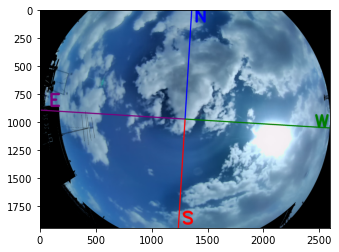

In [3]:
img_pts_card = pycam.dibujo_puntos_cardinales(img_bgr)

pycam.muestra_imagen(img_pts_card)

   #### Camino del sol
    Especificada una imagen, y el momento en el que se ha tomado, se puede dibujar el camino que deberá seguir el sol en este día.

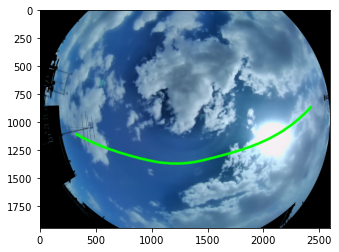

In [4]:
img_cam_sol = pycam.dibujo_camino_sol(img_bgr)

pycam.muestra_imagen(img_cam_sol)

   #### Máscara de nubes ( y el ratio nubes/cielo)
    Se obtiene la máscara de nubes a partir de la imagen tomada.

En esta imagen se observado que el porcentaje de nubes en el cielo es de 32.63%.


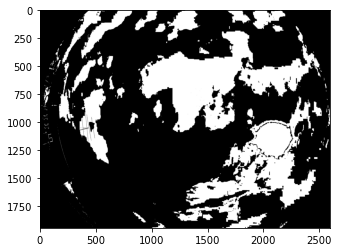

In [5]:
mask_nubes = pycam.mascara_nubes(img_bgr)
mask_cielo = pycam.mascara_cielo_visible(mask_nubes)

pycam.muestra_imagen(mask_nubes)

ratio_nubes = pycam.porcion_nubes_cielo(mask_nubes)
print('En esta imagen se observado que el porcentaje de nubes en el cielo es de {:.2f}%.'.format(ratio_nubes*100))

   #### Máscara del sol
    Se obtiene la máscara solar a partir de la imágen tomada.

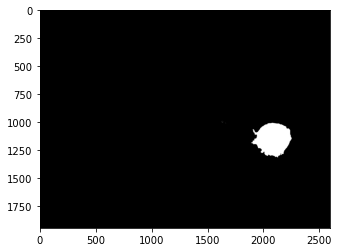

In [6]:
mask_sol = pycam.mascara_solar(img_bgr)

pycam.muestra_imagen(mask_sol)

   #### Factor solar (junto con el centroide solar, el área del sol en la imágen y su circularidad)
    Se obtiene el análisis del disco solar.

In [7]:
res_solar = pycam.sol_cubierto(img_bgr, hora=dt.now())

# res_solar = [factor_solar, centroide_solar, área_circumsolar, circularidad]
print(res_solar)

(0.25, (2081, 1151), 73994.0, 0.4961351867808774)


   #### Cálculo de intensidades medias y acumuladas
    Se realiza el cálculo de las intensidades medias o acumuladas en una región de la imágen.

In [8]:
modo_ = 'ITUR' # ITUR, CCIR o Equiponderado
coseno_ = False # True o False
gamma_ = 2.2 # False o factor gamma de la cámara

intensidad_media_nubes = pycam.intensidad_media(img_bgr, mask_nubes, modo=modo_, coseno=coseno_, gamma=gamma_)
print('Observamos una intensidad media en las nubes de {:.2f}.'.format(intensidad_media_nubes))

intensidad_acum_cielo = pycam.intensidad_acumulada(img_bgr, mask_cielo, modo=modo_, coseno=coseno_, gamma=gamma_)
print('Observamos que el {:.2f}% de la intensidad de la imagen se encuentra en la parte de cielo libre de nubes.'.format(intensidad_acum_cielo*100))

Observamos una intensidad media en las nubes de 207.58.
Observamos que el 62.34% de la intensidad de la imagen se encuentra en la parte de cielo libre de nubes.


   #### Ángulos sólidos
    Se obtiene la máscara de una región mediante la definición de un intervalo en los ángulos azimutal y cenital o una distancia al centroide solar.

C:\Users\nitra\Documents\GitHub\Camara\interfaz_camara.py:464: RuntimeWarning: divide by zero encountered in long_scalars
  alpha = np.rad2deg(np.arctan(delta_x / delta_y))
C:\Users\nitra\Documents\GitHub\Camara\interfaz_camara.py:464: RuntimeWarning: invalid value encountered in long_scalars
  alpha = np.rad2deg(np.arctan(delta_x / delta_y))


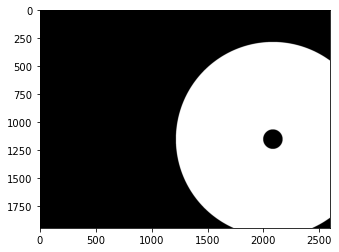

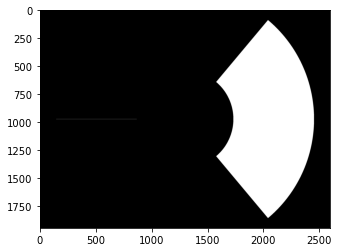

In [9]:
centroide = res_solar[1]
area_solar = res_solar[2]

radio_min = np.sqrt(area_solar / np.power(np.pi, 2))
radio_max = radio_min * 10
rango = [radio_min, radio_max]

metodo = 'distancia'
                 
mask_distancias = pycam.mascara_ang_solido(rango, metodo, centroide)
plt.figure(1)
pycam.muestra_imagen(mask_distancias)


metodo = 'angulos'
rango = [[30, 80], [220, 320]]

mask_angs =  pycam.mascara_ang_solido(rango, metodo)
plt.figure(2)
pycam.muestra_imagen(mask_angs)

   #### Estimación de la radiación difusa
    Se obtiene una estiamción de la radiación difusa percibida mediante el uso de los parámetros anteriores.

In [10]:
radiacion = pycam.rad_gh_teorica(dt.now())
factor_solar = res_solar[0]
intens_media = intensidad_media_nubes/255
tipo_cielo = 'nublado' # despejado o nublado
tipo_radiacion = 'teorica' # real o teorica

rad_difusa_estimada = pycam.rad_difusa(radiacion, ratio_nubes, factor_solar, intens_media, tipo_cielo, tipo_radiacion)
print('En esta imágen se estima que la radiacíon difusa percibida es de {:.2f} W/m2.'.format(rad_difusa_estimada))

En esta imágen se estima que la radiacíon difusa percibida es de 178.72 W/m2.


In [11]:
params = [img_bgr, modo_, coseno_, gamma_] # Sólo en caso de cielos nublados
mask_distancias = cv2.bitwise_and(mask_distancias, mask_distancias, mask=mask_nubes)

rad_sector_dist = pycam.estimar_radiacion_sector(rad_difusa_estimada, mask_distancias, mask_nubes, tipo_cielo, params)
print('La radiación estimada en el sector definido por la distancias al centroide solar es de {:.2f} W/m2.'.format(rad_sector_dist))

mask_angs = cv2.bitwise_and(mask_angs, mask_angs, mask=mask_nubes)
rad_sector_angs = pycam.estimar_radiacion_sector(rad_difusa_estimada, mask_angs, mask_nubes, tipo_cielo, params)
print('La radiación estimada en el sector definido por los ángulos zenit y azimut es de {:.2f} W/m2.'.format(rad_sector_angs))

La radiación estimada en el sector definido por la distancias al centroide solar es de 102.61 W/m2.
La radiación estimada en el sector definido por los ángulos zenit y azimut es de 62.49 W/m2.


 ### Funciones para imágenes en tiempo real
    A continuación, se muestran las funciones que se utilizan para realizar las mismas tareas que se han explciado anteriormente pero realizando una conexión con la cámara para obtener una imagen del cielo en tiempo real.

In [ ]:
# muestra_imagen_cielo()

# muestra_camino_sol()

# muestra_puntos_cardinales()

# muestra_cielo_visible()

# muestra_nubes()

# muestra_contorno_nubes()

# muestra_centroide_solar()

# estimar_radiacion_difusa()